Epoch 1/200


c:\Users\asus1\anaconda3\envs\MOSFET_NN_mini\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1031 - mae: 0.2159 - val_loss: 0.0229 - val_mae: 0.1157
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191 - mae: 0.1078 - val_loss: 0.0105 - val_mae: 0.0793
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - mae: 0.0717 - val_loss: 0.0051 - val_mae: 0.0536
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - mae: 0.0512 - val_loss: 0.0026 - val_mae: 0.0360
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - mae: 0.0324 - val_loss: 0.0013 - val_mae: 0.0212
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - mae: 0.0239 - val_loss: 9.7395e-04 - val_mae: 0.0161
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.1681e-04 - mae: 0.0204 - val_loss: 5.9149e-04 - val_mae: 0.0137
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8171e-04 - mae: 0.0161 - val_loss: 5.2795e-04 - val_mae: 0.0177
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

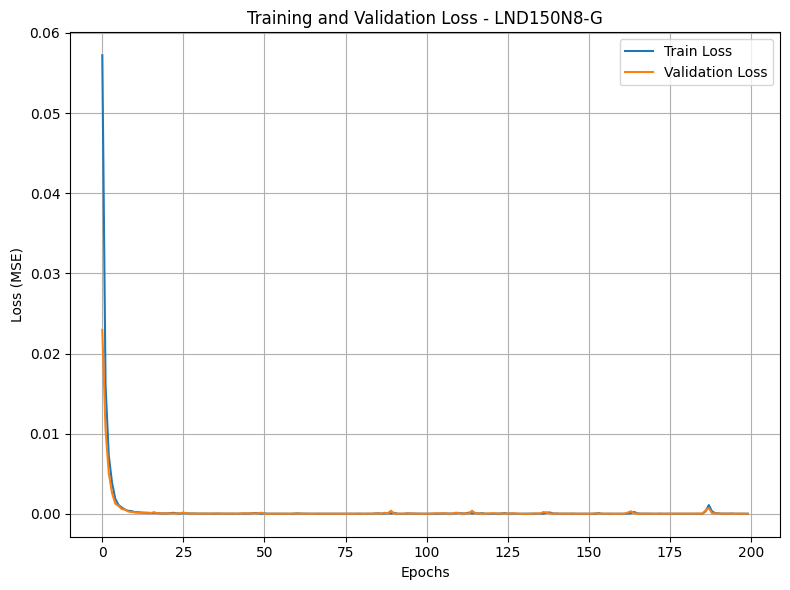

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Ouput 0-5V Gate -2-1V Step 0.25.txt"
data = np.loadtxt(file_path, usecols=(0, 1))  # Use only VDS and ID

# Extract VDS and ID
VDS = data[:, 0]
ID = data[:, 1]

# Define VGS range from -2V to 1V with 0.25V steps
VGS_values = np.arange(-2.0, 1.25, 0.25)
num_VGS = len(VGS_values)
num_points_per_sweep = len(VDS) // num_VGS

# Reshape VDS and prepare input features
VDS_sweep = VDS[:num_points_per_sweep]
X = np.array([[vgs, vds] for vgs in VGS_values for vds in VDS_sweep])
y = ID  # Output: ID current

# Normalize inputs and output
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split data for training/testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16,
                    validation_data=(X_test, y_test), verbose=1)

# Save the trained model
model.save("LND150N8-G.keras")
print("✅ Model saved as LND150N8-G.keras")

# Predict on test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test)

# Calculate performance metrics
mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred)

# Print metrics
print("\n📊 Model Performance for LND150N8-G:")
print(f"MAE  = {mae:.6e}")
print(f"MSE  = {mse:.6e}")
print(f"RMSE = {rmse:.6e}")
print(f"R²   = {r2:.6f}")

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss - LND150N8-G")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
